# Importing the Dataset

In [4]:
# importing the libraries to import dataset:
import pandas as pd
import numpy as np

# importing the dataset:
data=pd.read_csv('gdpWorld.csv')

#Viewing the dataset:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22",232,188,579
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61",101,"0,6",298
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


# Analysing the datasets:

In [5]:
# Shape of the dataset:
data.shape

(227, 20)

In [7]:
# columns in the dataset:
data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

# Data cleaning:

## 1.) Null-values

In [13]:
data.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

Here the number of rows having null values is less. so, we can drop those rows.

In [14]:
# Dropping the rows that containing null values:
data.dropna(inplace=True)

In [15]:
data.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [16]:
data.shape

(179, 20)

## 2.) Datatypes of each column

In [17]:
data.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)','Net migration', 'Infant mortality (per 1000 births)','Literacy (%)', 'Phones (per 1000)', 'Arable (%)','Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate','Agriculture', 'Industry', 'Service'  

These columns have object datatype. But they must have float datatype. To convert object to float datatype we need to replace "commas" with "dot" which is the representation of the float value.

###  First we need to separate columns having correct datatypes from columns having incorrect datatype

In [20]:
df1=data.iloc[:,[0,1,2,3,8]]
df1.head(2)

,Country,Region,Population,Area (sq. mi.),GDP ($ per capita)
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,700.0
1,Albania,EASTERN EUROPE,3581655,28748,4500.0


In [21]:
df2=data.iloc[:,[4,5,6,7,9,10,11,12,13,14,15,16,17,18,19]]
df2.head(2)

,Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,"48,0","0,00","23,06","163,07","36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,"124,6","1,26","-4,93","21,52","86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22",232,188,579


### Now we can deal only with df2 dataset

In [22]:
df2.dtypes

Pop. Density (per sq. mi.)            object
Coastline (coast/area ratio)          object
Net migration                         object
Infant mortality (per 1000 births)    object
Literacy (%)                          object
Phones (per 1000)                     object
Arable (%)                            object
Crops (%)                             object
Other (%)                             object
Climate                               object
Birthrate                             object
Deathrate                             object
Agriculture                           object
Industry                              object
Service                               object
dtype: object

In [23]:
# replacing ',' with '.'
df2=df2.stack().str.replace(',','.').unstack()
df2.head(2)

,Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,48.0,0.00,23.06,163.07,36.0,3.2,12.13,0.22,87.65,1,46.6,20.34,0.38,0.24,0.38
1,124.6,1.26,-4.93,21.52,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,232,188,579


Here we can see that ',' is replaced by '.'

In [24]:
df2.dtypes

Pop. Density (per sq. mi.)            object
Coastline (coast/area ratio)          object
Net migration                         object
Infant mortality (per 1000 births)    object
Literacy (%)                          object
Phones (per 1000)                     object
Arable (%)                            object
Crops (%)                             object
Other (%)                             object
Climate                               object
Birthrate                             object
Deathrate                             object
Agriculture                           object
Industry                              object
Service                               object
dtype: object

But still all the columns in df2 is of object datatype. We need to convert them into float values.

In [28]:
# changing the datatypes 
df2=df2.apply(pd.to_numeric)
df2.dtypes

Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

Thus we have converted the datatypes. Now we need to merge df1 and df2.

In [31]:
data=pd.concat([df1,df2],axis='columns')
data.head()

,Country,Region,Population,Area (sq. mi.),GDP ($ per capita),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,700.0,48.0,0.00,23.06,163.07,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655,28748,4500.0,124.6,1.26,-4.93,21.52,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,232.00,188.00,579.00
2,Algeria,NORTHERN AFRICA,32930091,2381740,6000.0,13.8,0.04,-0.39,31.00,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,101.00,0.60,298.00
6,Anguilla,LATIN AMER. & CARIB,13477,102,8600.0,132.1,59.80,10.76,21.03,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.04,0.18,0.78
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,11000.0,156.0,34.54,-6.15,19.46,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,38.00,0.22,743.00


# Choosing the right parameters for model building:

In [37]:
# importing data visualisation libraries

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,8)

import seaborn as sns

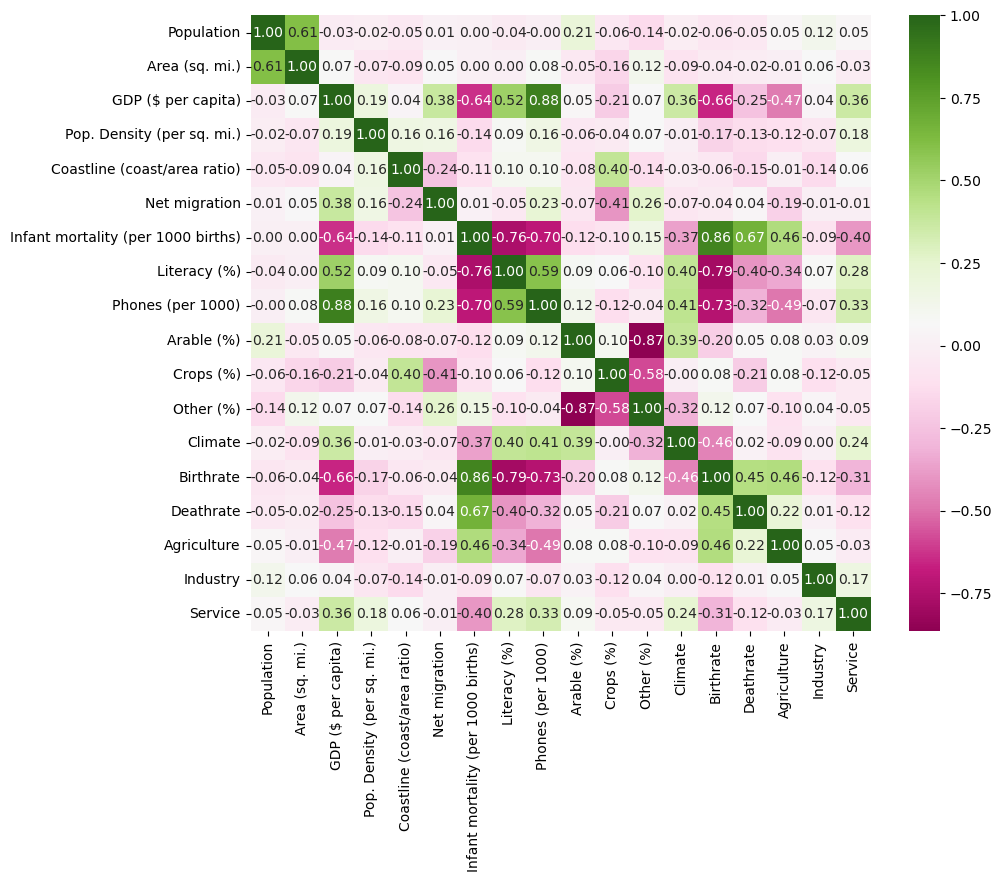

In [115]:
sns.heatmap(data.corr(),cmap='PiYG',annot=True,fmt='.2f')
plt.show()

From the above heatmap we found that 'Infant mortality (per 1000 births)', 'Literacy (%)', 'Phones (per 1000)', 'Birthrate' and 'Agriculture' have high co-relation with 'GDP ($ per capita)'

Other parameters have very less co-relation with 'GDP ($ per capita)'. So, we can better avoid them while building a model.
This is because if we take low co-related parameters then it will affect the accuracy of the model.

# Model Creation:

## x and y variables:

In [42]:
x=data.iloc[:,[8,9,10,15,17]]
x.head(2)

,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Birthrate,Agriculture
0,163.07,36.0,3.2,46.60,0.38
1,21.52,86.5,71.2,15.11,232.00


In [43]:
y=data['GDP ($ per capita)']
y.head(2)

0     700.0
1    4500.0
Name: GDP ($ per capita), dtype: float64

## Splitting the data into training and testing datasets:

In [71]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=45)

## Creating the model:

In [72]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

## Testing the model:

In [85]:
ypredict=model.predict(xtest)
print(ypredict)

[29493.39294351 13331.06575438  1499.09572375  6640.10402624
  1792.26955361 19593.14869076  5365.14197358 19476.23974058
  6210.71114819  2720.06410811  3300.50981174  -307.92054839
  7582.04886895  3838.67966917 20473.49891606  2963.22662816
 16733.53587201  8700.10976883  3098.2413243   -673.05815835
  8114.72899509   288.648205    -714.23746911  8915.83622059
  8514.34099852  1394.87079248  -122.28311871 23154.80651939
 20058.77872519  1790.69430069  6146.13853464 22771.22254493
  1693.08290008 17248.01813128 18481.05411669 19301.03685017]


In [91]:
print(ytest.head())

195    26800.0
204     9500.0
0        700.0
75      2500.0
72      5500.0
Name: GDP ($ per capita), dtype: float64


### Now let us plot the comparison of Actual and Predicted values.

In [92]:
comp_tab=pd.DataFrame({'Actual_value':ytest,'Predicted_value':ypredict})
comp_tab.head()

,Actual_value,Predicted_value
195,26800.0,29493.392944
204,9500.0,13331.065754
0,700.0,1499.095724
75,2500.0,6640.104026
72,5500.0,1792.269554


In [110]:
def comp_plot(df):
    df.plot(kind='bar',figsize=(20,5))
    plt.grid(True)
    plt.show()

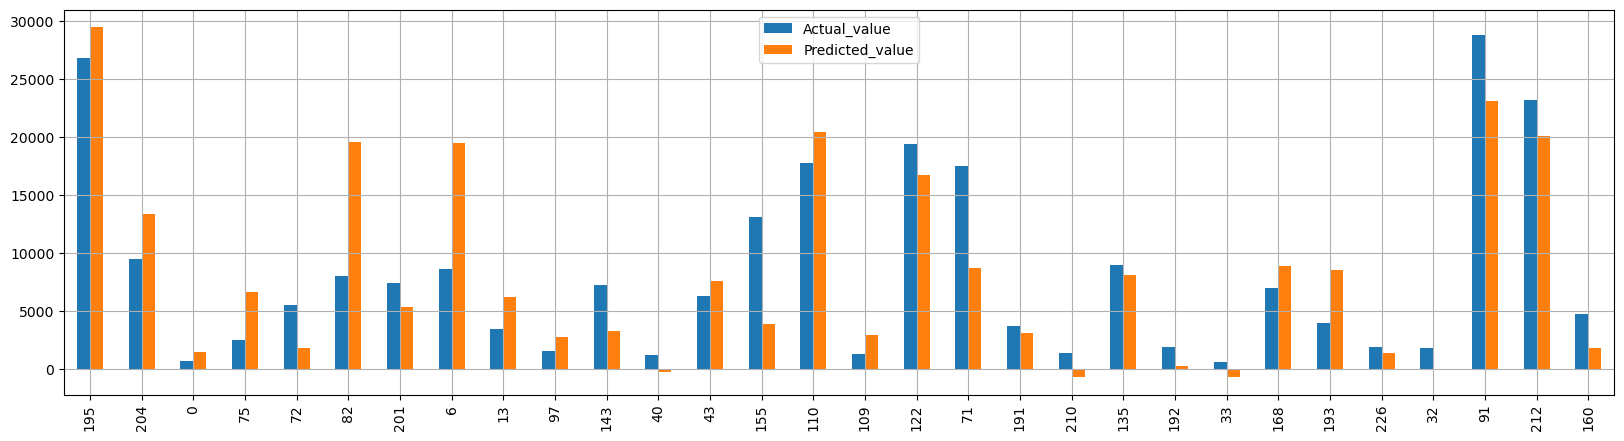

In [111]:
comp_plot(comp_tab.head(30))

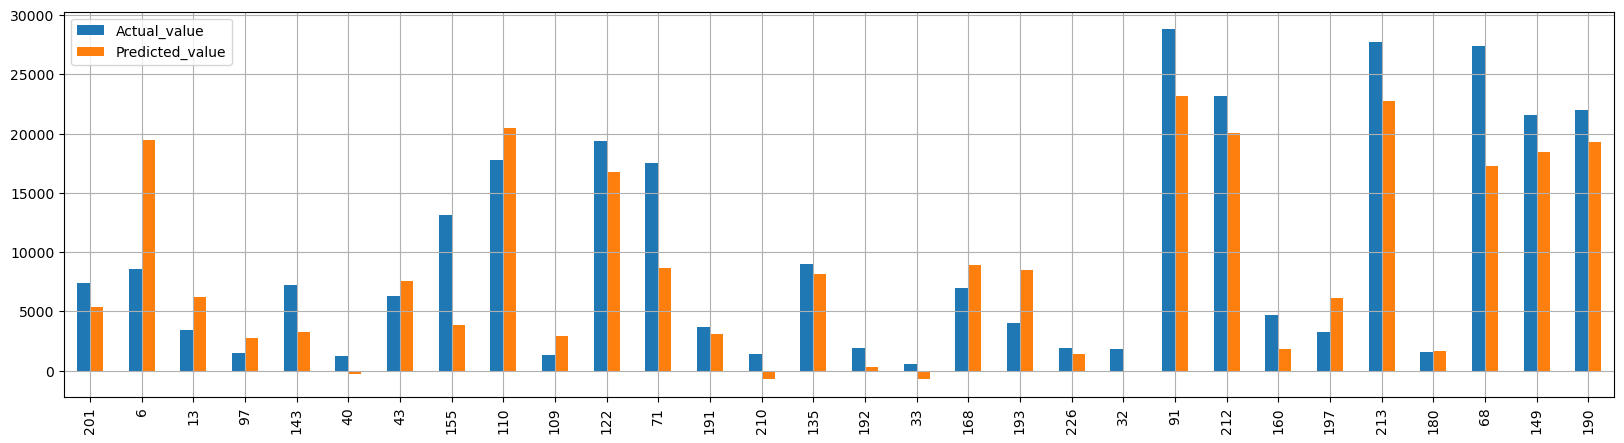

In [112]:
comp_plot(comp_tab.tail(30))

## Accuracy of the model:

In [113]:
model.score(xtrain,ytrain)

0.790067442130222

# Testing the model

In [122]:
imr=float(input('Infant Mortality Rate per 1000: '))
lit=float(input('Literacy percentage: '))
phn=float(input('No.of peoples having phones per 1000: '))
birth=float(input('Birth rate: '))
agri=float(input('Agriculture: '))
print(' ')

arr=model.predict([[imr,lit,phn,birth,agri]])

print('The Estimated GDP($ per capita) is $',arr[0])

Infant Mortality Rate per 1000: 179.86
Literacy percentage: 60.28
No.of peoples having phones per 1000: 120
Birth rate: 18.74
Agriculture: 123.02
 
The Estimated GDP($ per capita) is $ 6746.422429553655


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
